           variable     value
0               qs1  0.002426
1               qs1  0.002051
2               qs1  0.001974
3               qs1  0.001924
4               qs1  0.001924
..              ...       ...
695  partition_sort  0.000970
696  partition_sort  0.000949
697  partition_sort  0.000956
698  partition_sort  0.000955
699  partition_sort  0.000965

[700 rows x 2 columns]
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
        merge1 partition_sort  -0.0007  0.001 -0.0008 -0.0007   True
        merge1            qs1   0.0002  0.001  0.0001  0.0002   True
        merge1            qs2   0.0005  0.001  0.0004  0.0005   True
        merge1            qs3   0.0005  0.001  0.0004  0.0005   True
        merge1            qs4   0.0001 0.0116     0.0  0.0001   True
        merge1            qs5      0.0 0.4732    -0.0  0.0001  F

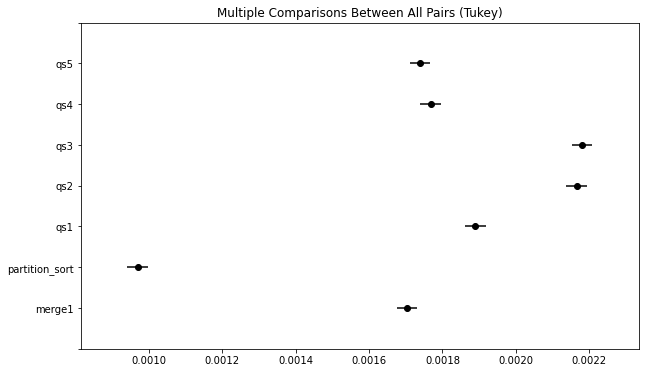

In [1]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv('data.csv')

anova = stats.f_oneway(data['qs1'], data['qs2'], data['qs3'], data['qs4'], data['qs5'], data['merge1'], data['partition_sort']).pvalue

melt = pd.melt(data)
print(melt)
posthoc = pairwise_tukeyhsd(melt['value'],melt['variable'],alpha =0.05)
print(posthoc)

fig = posthoc.plot_simultaneous()